In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import tensorflow as tf
from transformers import BertTokenizer

In [ ]:
df = pd.read_csv('df_survey.csv',sep = ",", engine='python', encoding = "utf-8")
df.head()

,Unnamed: 0,text,class,explicit_hate,implicit_hate,not_hate,offensive
0,9946,so jew hating muslim of them those sneaky jew...,explicit_hate,1,0,0,0
1,21168,Stoni is a fuckin queer...,explicit_hate,1,0,0,0
2,7282,they are out smarting u . anither proof had th...,explicit_hate,1,0,0,0
3,4179,if the people of the state don't want faggots ...,explicit_hate,1,0,0,0
4,20880,Soros needs to die like a diseased dog in the ...,explicit_hate,1,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     900 non-null    int64 
 1   text           899 non-null    object
 2   class          900 non-null    object
 3   explicit_hate  900 non-null    int64 
 4   implicit_hate  900 non-null    int64 
 5   not_hate       900 non-null    int64 
 6   offensive      900 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 49.3+ KB


In [ ]:
df = df.dropna(axis=0)
df.head()

,Unnamed: 0,text,class,explicit_hate,implicit_hate,not_hate,offensive
0,9946,so jew hating muslim of them those sneaky jew...,explicit_hate,1,0,0,0
1,21168,Stoni is a fuckin queer...,explicit_hate,1,0,0,0
2,7282,they are out smarting u . anither proof had th...,explicit_hate,1,0,0,0
3,4179,if the people of the state don't want faggots ...,explicit_hate,1,0,0,0
4,20880,Soros needs to die like a diseased dog in the ...,explicit_hate,1,0,0,0


In [ ]:
df = df.drop(['Unnamed: 0', 'explicit_hate','implicit_hate', 'not_hate', 'offensive'], axis=1)
df.head()

,text,class
0,so jew hating muslim of them those sneaky jew...,explicit_hate
1,Stoni is a fuckin queer...,explicit_hate
2,they are out smarting u . anither proof had th...,explicit_hate
3,if the people of the state don't want faggots ...,explicit_hate
4,Soros needs to die like a diseased dog in the ...,explicit_hate


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


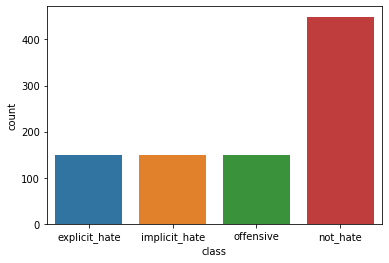

In [ ]:
import seaborn as sns
sns.countplot('class', data = df)

### **Data Preparation**

In [ ]:
df['class'] = pd.factorize(df['class'])[0].astype(np.uint16)
print(df['class'].unique())
df

[0 1 2 3]


,text,class
0,so jew hating muslim of them those sneaky jew...,0
1,Stoni is a fuckin queer...,0
2,they are out smarting u . anither proof had th...,0
3,if the people of the state don't want faggots ...,0
4,Soros needs to die like a diseased dog in the ...,0
...,...,...
895,stand up for true tolerance gov already allow...,3
896,women and white nationalism redux : does the ...,3
897,military freedom of religion,3
898,outside that mike downs poll there is not one...,3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


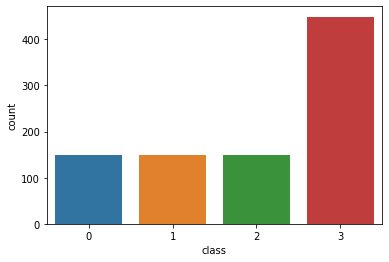

In [ ]:
import seaborn as sns
sns.countplot('class', data = df)

In [ ]:
df['class'].value_counts()

'''
The sentiment labels are:

0 - explicit hate
1 - implicit hate
2 - offensive
3 - not_hate
'''

'\nThe sentiment labels are:\n\n0 - explicit hate\n1 - implicit hate\n2 - offensive\n3 - not_hate\n'

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

In [ ]:
token = tokenizer.encode_plus(
    df['text'].iloc[0],  
    max_length = 256,
    truncation=True, 
    padding='max_length', 
    add_special_tokens=True,
    return_tensors='tf'
)

In [ ]:
token.input_ids

<tf.Tensor: shape=(1, 256), dtype=int32, numpy=
array([[  101,  1177,   179,  5773, 26766,   182,  1361, 24891,  1104,
         1172,  1343, 14647,  1183,   179, 17540,  1155,  1405,  6159,
         6904,  1179,  5016,   122,   119,   126,  3775,  1104,   182,
         1361, 24891, 23283, 24891,  1116,  1579,  7338,  1103,   179,
        17540,   119,   102,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0, 

In [ ]:
X_input_ids = np.zeros((len(df),256))
X_attn_masks = np.zeros((len(df),256))

In [ ]:
def generate_training_data(df, ids, masks, tokenizer):
    for i, text in tqdm(enumerate(df['text'])):
        tokenized_text = tokenizer.encode_plus(
            text,
            max_length=256, 
            truncation=True, 
            padding='max_length', 
            add_special_tokens=True,
            return_tensors='tf'
        )
        ids[i, :] = tokenized_text.input_ids
        masks[i, :] = tokenized_text.attention_mask
    return ids, masks

In [ ]:
token

{'input_ids': <tf.Tensor: shape=(1, 256), dtype=int32, numpy=
array([[  101,  1177,   179,  5773, 26766,   182,  1361, 24891,  1104,
         1172,  1343, 14647,  1183,   179, 17540,  1155,  1405,  6159,
         6904,  1179,  5016,   122,   119,   126,  3775,  1104,   182,
         1361, 24891, 23283, 24891,  1116,  1579,  7338,  1103,   179,
        17540,   119,   102,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0, 

In [ ]:
X_input_ids, X_attn_masks = generate_training_data(df, X_input_ids, X_attn_masks, tokenizer)

0it [00:00, ?it/s]

In [ ]:
labels = np.zeros((len(df), 4))
labels.shape

(899, 4)

In [ ]:
labels[np.arange(len(df)), df['class'].values] = 1 # one-hot encoded target tensor

In [ ]:
labels

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [ ]:
# creating a data pipeline using tensorflow dataset utility, creates batches of data for easy loading...
dataset = tf.data.Dataset.from_tensor_slices((X_input_ids, X_attn_masks, labels))
dataset.take(1) # one sample data

<TakeDataset element_spec=(TensorSpec(shape=(256,), dtype=tf.float64, name=None), TensorSpec(shape=(256,), dtype=tf.float64, name=None), TensorSpec(shape=(4,), dtype=tf.float64, name=None))>

In [ ]:
def SentimentDatasetMapFunction(input_ids, attn_masks, labels):
    return {
        'input_ids': input_ids,
        'attention_mask': attn_masks
    }, labels

In [ ]:
dataset = dataset.map(SentimentDatasetMapFunction) # converting to required format for tensorflow dataset 

In [ ]:
dataset = dataset.shuffle(899).batch(16, drop_remainder=True)

In [ ]:
p = 0.8
train_size = int((len(df)//1)*p) # for each 16 batch of data we will have len(df)//16 samples, take 80% of that for train.

In [ ]:
train_size

719

In [ ]:
train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size)

### **Model**

In [ ]:
from transformers import TFBertModel

In [ ]:
model = TFBertModel.from_pretrained('bert-base-cased') # bert base model with pretrained weights

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
# defining 2 input layers for input_ids and attn_masks
input_ids = tf.keras.layers.Input(shape=(256,), name='input_ids', dtype='int32')
attn_masks = tf.keras.layers.Input(shape=(256,), name='attention_mask', dtype='int32')

bert_embds = model.bert(input_ids, attention_mask=attn_masks)[1] # 0 -> activation layer (3D), 1 -> pooled output layer (2D)
intermediate_layer = tf.keras.layers.Dense(512, activation='relu', name='intermediate_layer')(bert_embds)
output_layer = tf.keras.layers.Dense(4, activation='softmax', name='output_layer')(intermediate_layer) # softmax -> calcs probs of classes

sentiment_model = tf.keras.Model(inputs=[input_ids, attn_masks], outputs=output_layer)
sentiment_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 256)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 256)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  108310272   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 256,                                         

In [ ]:
optim = tf.optimizers.Adam(learning_rate=1e-5, decay=1e-6)
loss_func = tf.keras.losses.CategoricalCrossentropy()
acc = (tf.metrics.CategoricalAccuracy('accuracy'), tf.keras.metrics.Precision(),tf.keras.metrics.Recall())

In [ ]:
sentiment_model.compile(optimizer=optim, loss=loss_func, metrics=[acc])

In [ ]:
hist = sentiment_model.fit(train_dataset,validation_data=val_dataset, epochs=10)

Epoch 1/10
56/56 [==============================] - 47s 843ms/step - loss: 0.6173 - accuracy: 0.7634 - precision_9: 0.8025 - recall_9: 0.7165
Epoch 2/10
56/56 [==============================] - 47s 839ms/step - loss: 0.4754 - accuracy: 0.8125 - precision_9: 0.8481 - recall_9: 0.7790
Epoch 3/10
56/56 [==============================] - 48s 849ms/step - loss: 0.3613 - accuracy: 0.8672 - precision_9: 0.8831 - recall_9: 0.8348
Epoch 4/10
56/56 [==============================] - 47s 845ms/step - loss: 0.2724 - accuracy: 0.9040 - precision_9: 0.9174 - recall_9: 0.8929
Epoch 5/10
56/56 [==============================] - 47s 834ms/step - loss: 0.1886 - accuracy: 0.9386 - precision_9: 0.9447 - recall_9: 0.9342
Epoch 6/10
56/56 [==============================] - 47s 839ms/step - loss: 0.1458 - accuracy: 0.9520 - precision_9: 0.9539 - recall_9: 0.9464
Epoch 7/10
56/56 [==============================] - 47s 838ms/step - loss: 0.0958 - accuracy: 0.9676 - precision_9: 0.9731 - recall_9: 0.9676
Epoch 